# **Installing important libraries**

In [1]:
pip install fastai

In [2]:
pip install fastai --upgrade

In [3]:
pip install Cython

# **Importing Dataset and Libraries**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/MyDrive/PlantVillage'

Mounted at /content/drive


In [5]:
import os
from os import listdir
import matplotlib.pyplot as plt
import numpy as np
from fastai.vision.all import *

# **Exploratory Data Analysis**

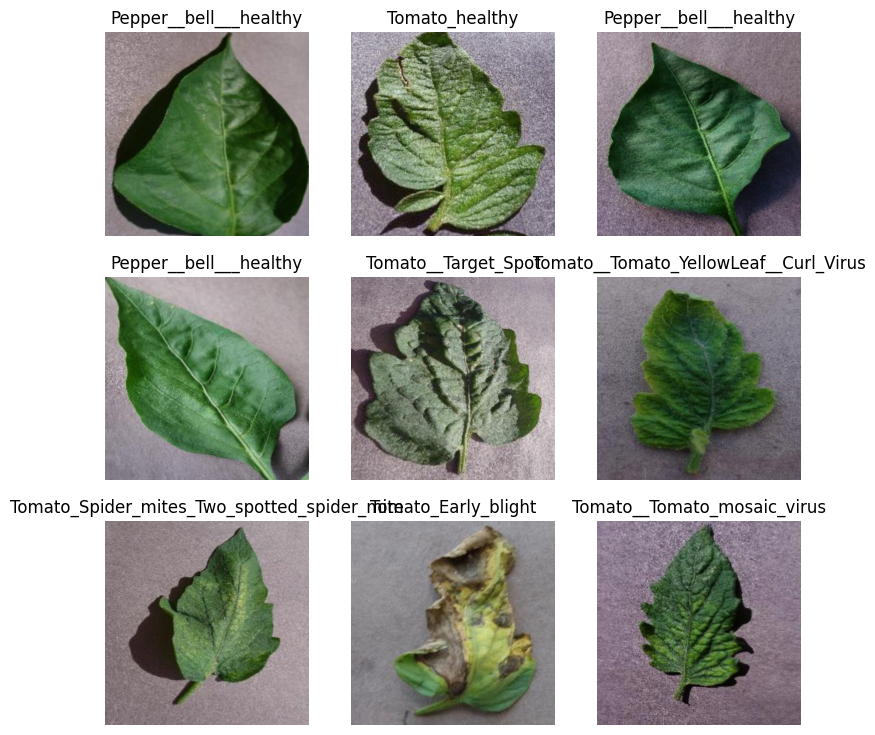

In [6]:
data_augmentation = aug_transforms()

# Create a Fastai DataBlock
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*data_augmentation, Normalize.from_stats(*imagenet_stats)]
)

# Create DataLoaders
dls = dblock.dataloaders(dataset_path, bs=32)

dls.show_batch()

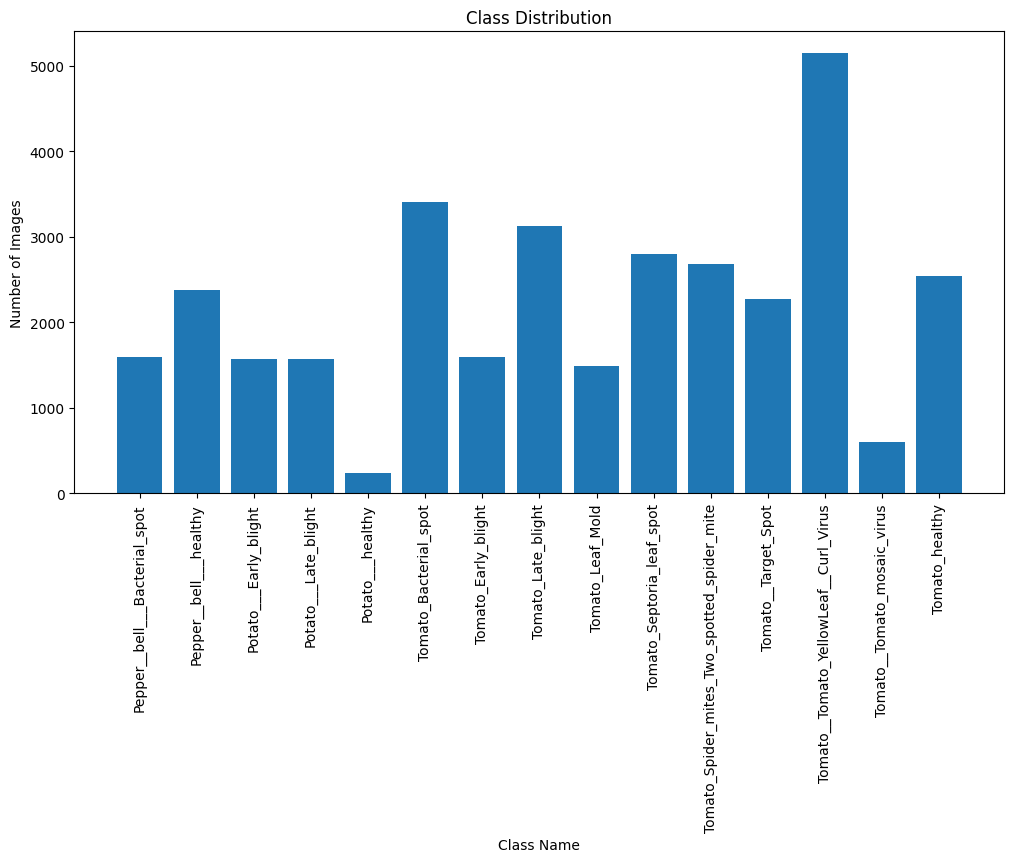

In [9]:
# Plot class distribution
def plot_class_distribution(dls):
    class_counts = {class_name: 0 for class_name in dls.vocab}
    for _, label in dls.train_ds:
        class_counts[dls.vocab[label]] += 1

    class_names = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(12, 6))
    plt.bar(class_names, counts)
    plt.xlabel('Class Name')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    plt.xticks(rotation=90)
    plt.show()

plot_class_distribution(dls)
